In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
purchase = pd.read_csv('./09-grocery/purchase_history.csv')
item = pd.read_csv('./09-grocery/item_to_id.csv')

In [3]:
purchase

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."
...,...,...
39469,704794,"48,42,44,10,2"
39470,31237,"23,21,26,27,41,9,47,43,20,40,16,24,46"
39471,724925,"3,39,28,4,1,43,47,27,18,25,44,10,30,2"
39472,651509,"13,39,20,32,37,1,3,18,34"


In [4]:
item

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39
5,dinner rolls,37
6,tortillas,34
7,bagels,13
8,canned vegetables,28
9,spaghetti sauce,26


In [5]:
purchase['user_id'].count()

39474

In [6]:
len(purchase['user_id'].unique())

24885

In [7]:
purchase[purchase['user_id'] == 651509]

,user_id,id
26101,651509,"18,44,45,6,28,39"
39472,651509,"13,39,20,32,37,1,3,18,34"


In [8]:
print(sorted(item['Item_id'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [9]:
def id_to_item(df):
    ids = df['id'].str.split(',').sum()
    id_list = [0 for i in range(1, 49)]
    for i in ids:
        id_list[int(i) - 1] += 1
    return pd.Series(id_list, index = list(range(1, 49)))

In [10]:
user_item_count = purchase.groupby('user_id').apply(id_to_item)
user_item_count.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [11]:
user_count = user_item_count.sum(axis = 1).reset_index().rename(columns = {0: 'count'})
user_count.sort_values(by = 'count', ascending = False).head()

,user_id,count
4445,269335,72
6111,367872,70
6623,397623,64
9918,599172,64
6291,377284,63


so the customer who bought the most items is with user_id269335 and bought 72 items

In [12]:
item_count = user_item_count.apply(np.argmax, axis = 0).reset_index().rename(columns = {'index': 'Item_id', 0: 'user_id'})
item_count

/Users/zhenyuxu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


,Item_id,user_id
0,1,31625
1,2,31625
2,3,154960
3,4,5289
4,5,217277
5,6,334664
6,7,175865
7,8,151926
8,9,269335
9,10,618914


In [13]:
merge_data = item_count.merge(item, on = 'Item_id', how = 'left')
merge_data[['Item_id', 'Item_name', 'user_id']]

,Item_id,Item_name,user_id
0,1,sugar,31625
1,2,lettuce,31625
2,3,pet items,154960
3,4,baby items,5289
4,5,waffles,217277
5,6,poultry,334664
6,7,sandwich bags,175865
7,8,butter,151926
8,9,soda,269335
9,10,carrots,618914


In [14]:
feature = user_item_count.T

In [15]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [16]:
n_range = range(2, 31)
inertias = []
silhouettes = []
for n_clusters in n_range:
    kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state = 66, n_jobs = -1)
    kmeans = kmeans.fit(feature)
    label = kmeans.predict(feature)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(feature, label))
    
    

/Users/zhenyuxu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/zhenyuxu/Applications/anaconda/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


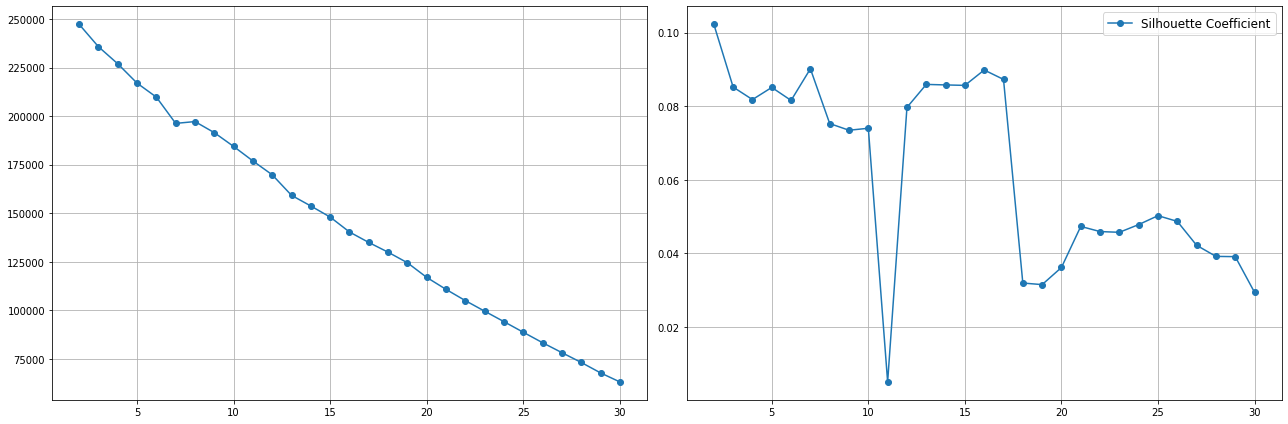

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(n_range, inertias, 'o-', label='Sum of Squared Distances')
ax[0].grid(True)
ax[1].plot(n_range, silhouettes, 'o-', label='Silhouette Coefficient')
ax[1].grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 11, init = 'k-means++',random_state = 66, n_jobs = -1)
kemans = kmeans.fit(feature)
label = kmeans.predict(feature)

In [19]:
pca = PCA(n_components = 2, random_state = 42)
pca = pca.fit(feature)
pca_feature = pca.transform(feature)

In [24]:
pca_feature[1][0]

75.94301117131471

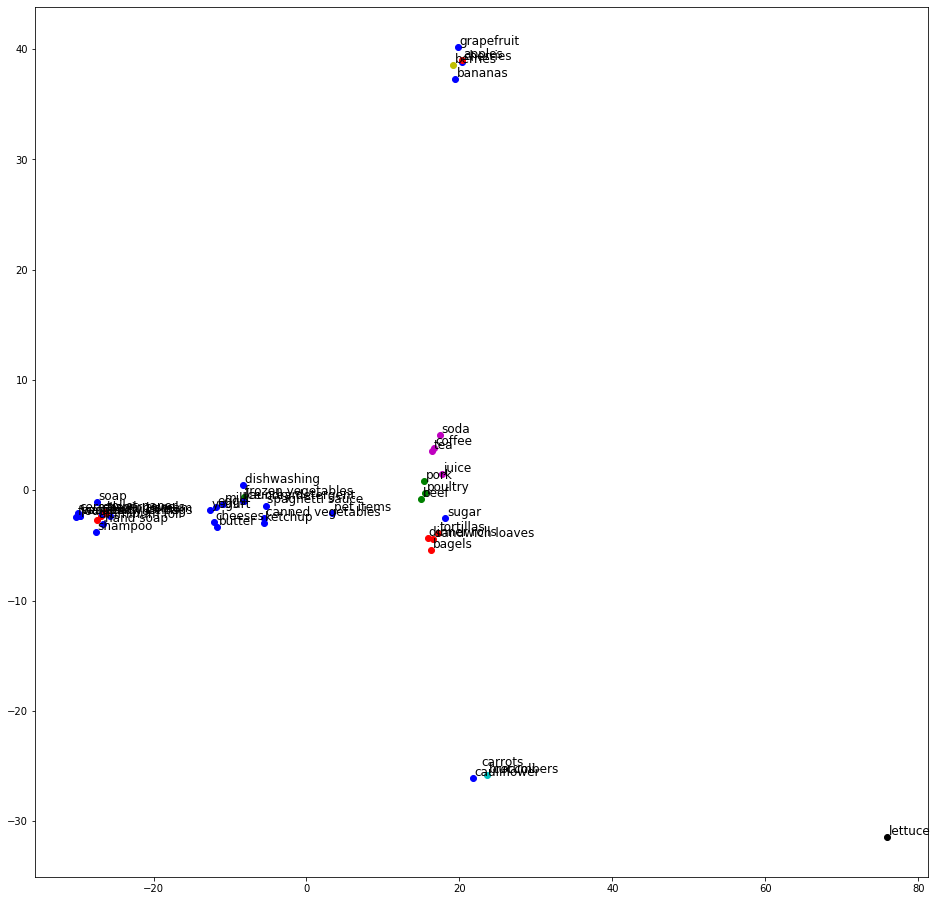

In [27]:
# visualization in 2D
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, ax = plt.subplots(figsize=(16, 16))
for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y = pca_feature[j][1]
    ax.plot(x, y, 'o', color=colors[label[j] % 8])
    name = item[item['Item_id'] == j + 1]['Item_name']
    ax.annotate(xy=(x+0.2, y+0.2), s=name.values[0], fontsize=12)

plt.show()

In [33]:
df = pd.DataFrame({'Item_id': list(range(1,49)), 'label': label})
df = df.merge(item, on = 'Item_id', how = 'left')

for i in range(0,11):
    print(i, '\t', list(df[df['label'] == i]['Item_name']))

0 	 ['grapefruit', 'cherries']
1 	 ['frozen vegetables']
2 	 ['sandwich bags', 'aluminum foil', 'paper towels', 'apples', 'toilet paper', 'dinner rolls']
3 	 ['broccoli']
4 	 ['soda', 'tea', 'juice', 'coffee']
5 	 ['berries']
6 	 ['lettuce']
7 	 ['carrots', 'cucumbers']
8 	 ['sugar', 'pet items', 'baby items', 'waffles', 'butter', 'cereals', 'shampoo', 'eggs', 'milk', 'laundry detergent', 'shaving cream', 'cheeses', 'spaghetti sauce', 'dishwashing\xa0', 'canned vegetables', 'hand soap', 'flour', 'pasta', 'soap', 'ice cream', 'ketchup', 'cauliflower', 'bananas', 'yogurt']
9 	 ['poultry', 'beef', 'pork']
10 	 ['bagels', 'tortillas', 'sandwich loaves']


In [34]:
label

array([ 8,  6,  8,  8,  8,  9,  2,  8,  4,  7,  8,  8, 10,  8,  2,  8,  9,
        8,  8,  0,  8,  1,  4,  2,  0,  8,  8,  8,  8,  8,  8,  2,  2, 10,
        8,  8,  2,  4, 10,  5,  8,  7,  4,  3,  8,  8,  9,  8],
      dtype=int32)